# Indiana Flood Risk
## Deep Neural Networks for Supervised Learning - Regression

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns  #Seaborn is another powerful visulization library for Python
from sklearn.linear_model import Ridge
import os

C:\Users\jmatney\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = "C:\\Users\jmatney\Documents\GitHub\IndianaRisk\data"
df = pd.read_csv(os.path.join(path, "IndianaRisk.csv"))

In [3]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\jmatney\\Documents\\GitHub\\IndianaRisk\\scripts'

In [4]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  


Shape of the Dataset: (100, 42)


,subwatershed,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,...,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg,claims_total_building_insurance_coverage_avg
0,40400010303,106.11,54.56,0.45,85.49,3.97,22.38,0.04,0.53,4.72,...,1.47,18.41,23.36,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","64,285.55","33,104.28"
1,40400010503,54.66,45.84,0.33,38.18,3.10,13.28,0.01,0.37,3.23,...,1.22,6.01,8.10,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","29,839.39","15,823.07"
2,40500011001,89.52,74.92,0.20,54.63,3.66,13.57,0.14,0.45,2.06,...,0.08,2.66,49.32,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","55,680.81",179.54
3,40500011506,105.46,79.94,0.21,51.75,3.61,14.96,0.06,0.44,2.12,...,0.09,4.43,60.33,0.92,"5,735.26","4,511.41","2,418.30","5,107.41","37,778.49","26,955.98"
4,41000050102,87.28,64.13,0.27,28.41,2.42,13.24,0.49,0.53,2.01,...,5.10,2.54,28.17,21.89,"5,639.30","4,438.93","2,379.89","5,025.40","46,515.81","20,702.79"


# Metadata
*	**subwatershed** - a unique Id for each subwatershed

### Data Exploration

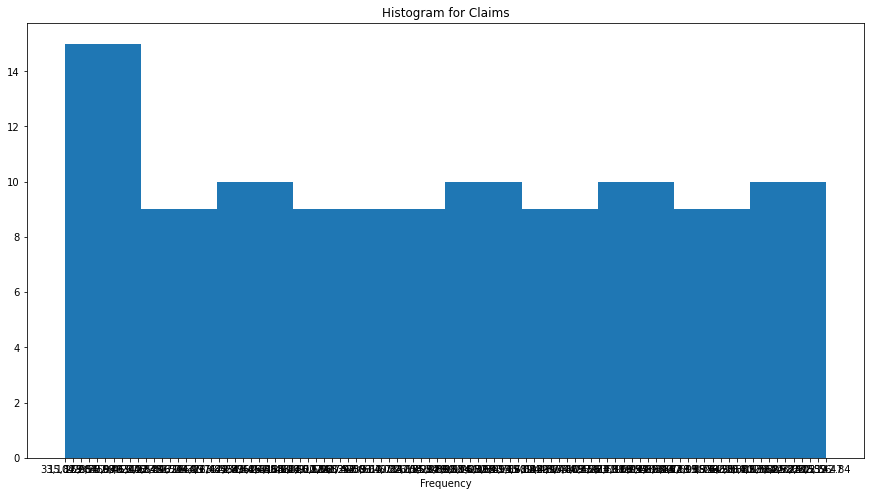

In [5]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df["claims_total_building_insurance_coverage_avg"])  
plt.title("Histogram for Claims")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020585C056C8>,
      dtype=object)

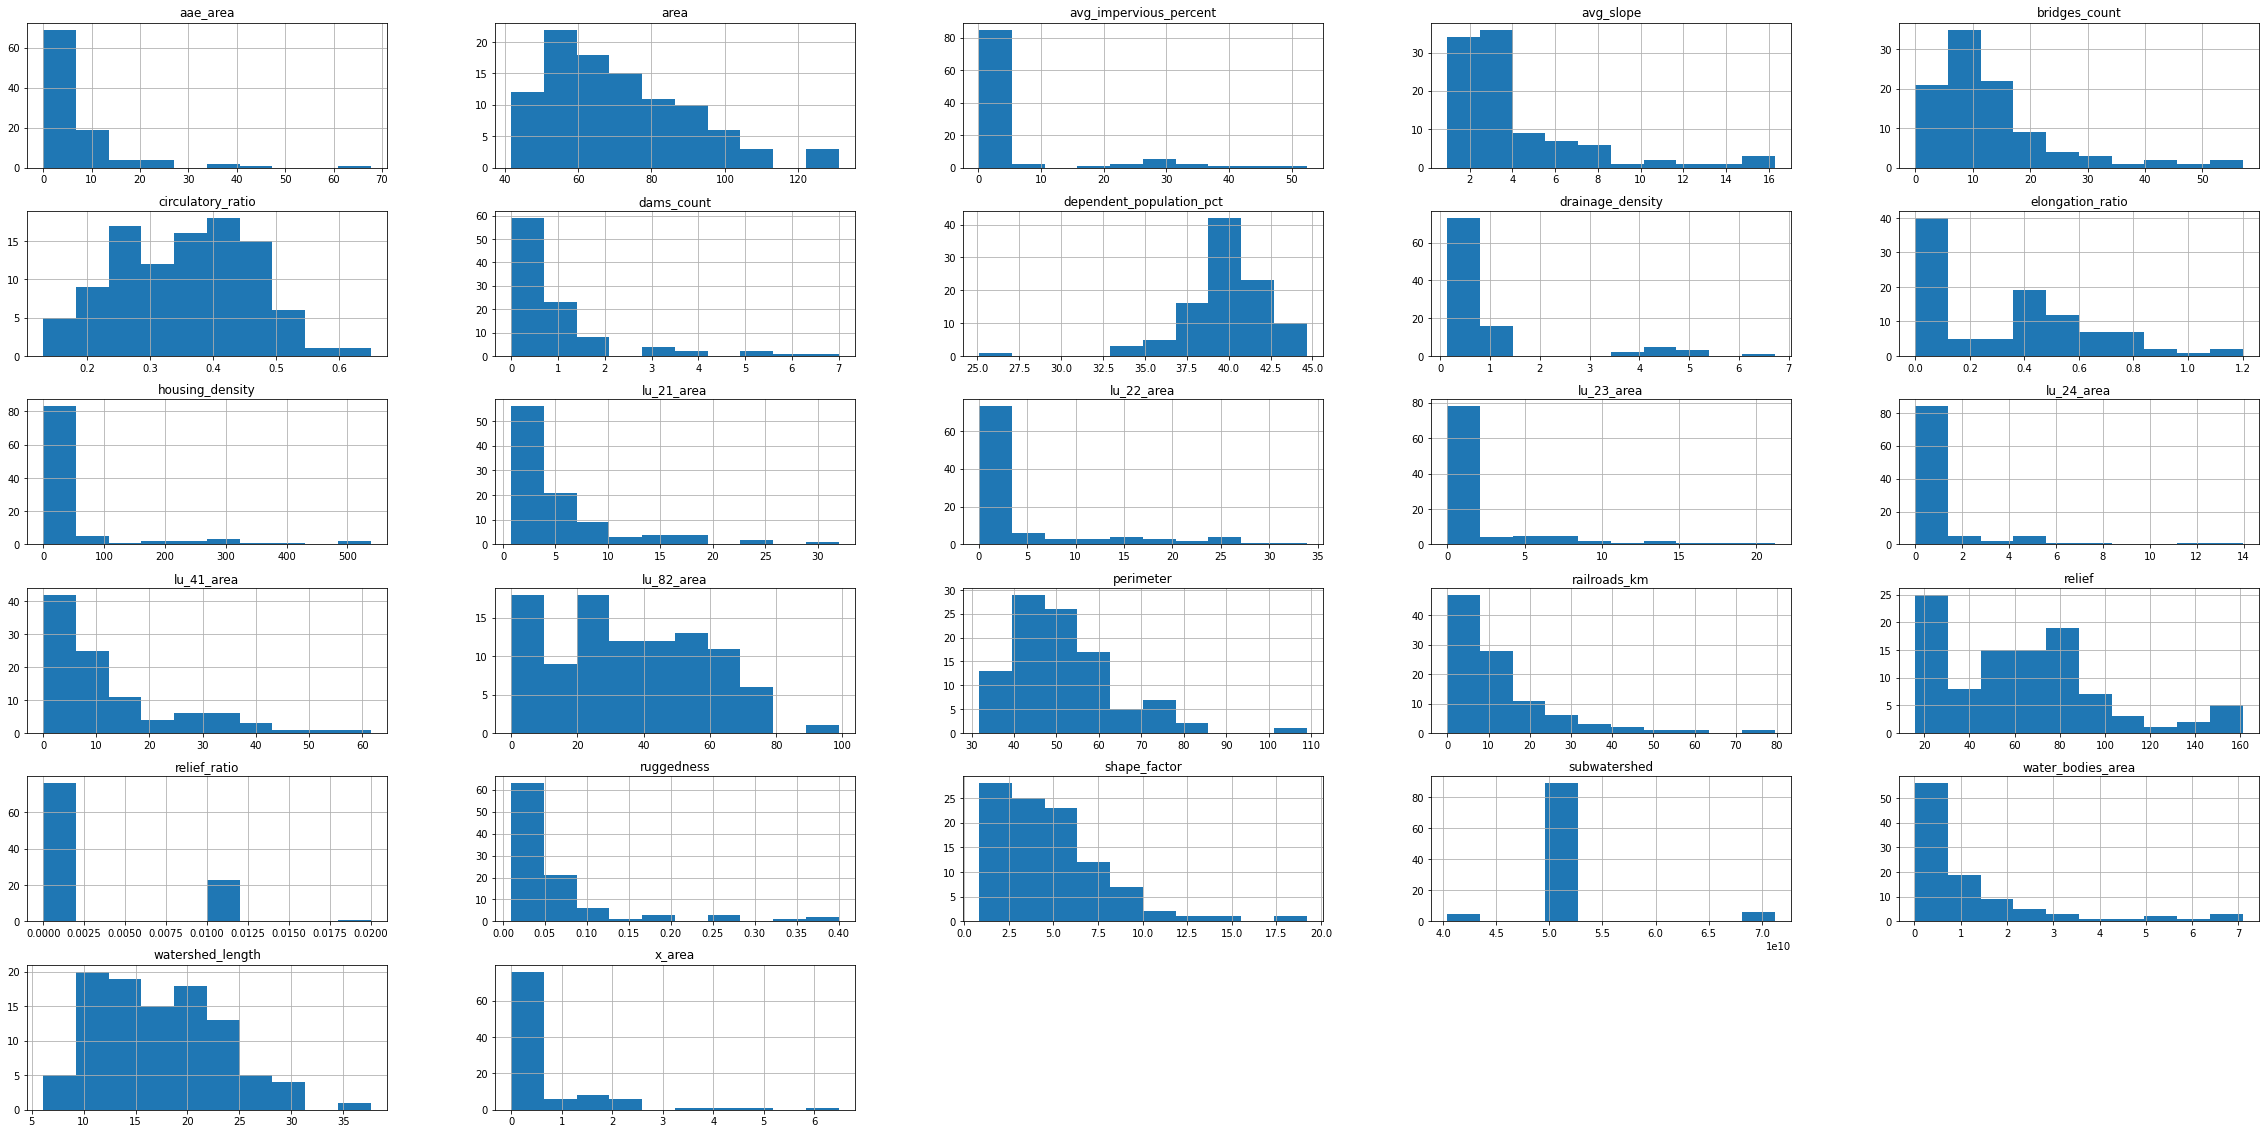

In [6]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df.hist(figsize=(40,20))

### Data Engineering

In [9]:
#Define a variable for each type of feature
target = ["claims_total_building_insurance_coverage_avg"]
test = [x for x in df if x != "claims_total_building_insurance_coverage_avg"]
numeric_columns = [x for x in test if x != "subwatershed"]

In [10]:
print("Shape of Data:",df.shape)
print("Distinct Datatypes:",df.dtypes.unique())
df[numeric_columns].head(5)

Shape of Data: (100, 42)
Distinct Datatypes: [dtype('int64') dtype('float64') dtype('O')]


,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,106.11,54.56,0.45,85.49,3.97,22.38,0.04,0.53,4.72,0.0,...,7.64,1.47,18.41,23.36,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","64,285.55"
1,54.66,45.84,0.33,38.18,3.10,13.28,0.01,0.37,3.23,0.0,...,5.19,1.22,6.01,8.10,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","29,839.39"
2,89.52,74.92,0.20,54.63,3.66,13.57,0.14,0.45,2.06,0.0,...,0.39,0.08,2.66,49.32,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","55,680.81"
3,105.46,79.94,0.21,51.75,3.61,14.96,0.06,0.44,2.12,0.0,...,0.33,0.09,4.43,60.33,0.92,"5,735.26","4,511.41","2,418.30","5,107.41","37,778.49"
4,87.28,64.13,0.27,28.41,2.42,13.24,0.49,0.53,2.01,0.0,...,8.43,5.10,2.54,28.17,21.89,"5,639.30","4,438.93","2,379.89","5,025.40","46,515.81"


### Feature Selection using the LassoCV estimator

In [11]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

Automatically created module for IPython interactive environment


In [12]:
X = df[numeric_columns]

In [13]:
X.head(5)

,area,perimeter,circulatory_ratio,relief,avg_slope,watershed_length,elongation_ratio,drainage_density,shape_factor,relief_ratio,...,lu_23_area,lu_24_area,lu_41_area,lu_82_area,avg_impervious_percent,orb100yr24ha_am,orb25yr24ha_am,orb2yr24ha_am,orb50yr24ha_am,policy_total_building_coverage_avg
0,106.11,54.56,0.45,85.49,3.97,22.38,0.04,0.53,4.72,0.0,...,7.64,1.47,18.41,23.36,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","64,285.55"
1,54.66,45.84,0.33,38.18,3.10,13.28,0.01,0.37,3.23,0.0,...,5.19,1.22,6.01,8.10,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","29,839.39"
2,89.52,74.92,0.20,54.63,3.66,13.57,0.14,0.45,2.06,0.0,...,0.39,0.08,2.66,49.32,0.15,"6,789.38","5,329.28","2,861.72","6,040.96","55,680.81"
3,105.46,79.94,0.21,51.75,3.61,14.96,0.06,0.44,2.12,0.0,...,0.33,0.09,4.43,60.33,0.92,"5,735.26","4,511.41","2,418.30","5,107.41","37,778.49"
4,87.28,64.13,0.27,28.41,2.42,13.24,0.49,0.53,2.01,0.0,...,8.43,5.10,2.54,28.17,21.89,"5,639.30","4,438.93","2,379.89","5,025.40","46,515.81"


In [14]:
y = df[target]
X = df[numeric_columns]

## Lasso Feature Selection 

In [15]:
lasso_clf = LassoCV().fit(X, y.values.ravel())
lasso_importance = np.abs(lasso_clf.coef_)
print(lasso_importance)

ValueError: could not convert string to float: '3,688.00'

## Ridge Feature Selection

In [ ]:
ridge_clf = Ridge().fit(X, y.values.ravel())
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

In [ ]:
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

feature_names = numeric_columns
idx_third = ridge_importance.argsort()[-3]
print(ridge_importance.argsort())

ridge_threshold = ridge_importance[idx_third] + 10
print('Threshold is: {}'.format(ridge_threshold))

# # How many features do we want?
# # Get the indicies
idx_features = (-ridge_importance).argsort()[:10]

# # subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

In [ ]:
# ridge_threshold = ridge_importance[idx_third] + 10
# print('Threshold is: {}'.format(ridge_threshold))

In [ ]:
# # How many features do we want?
# # Get the indicies
# idx_features = (-ridge_importance).argsort()[:10]

# # subset by the indicies
# name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(name_features))

In [ ]:
# sfm = SelectFromModel(ridge_clf, threshold=ridge_threshold)
# sfm.fit(X, y.values.ravel())
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]

### Min Max Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df_scale = scaler.transform(df)
np.round(df_scale, 3)

In [ ]:
df_scale_dataframe = pd.DataFrame(df_scale, columns = df.columns.values)

In [ ]:
# df_scale_dataframe.hist(figsize=(40,20))
df_scale_dataframe.to_csv("IN_DL_scale.csv")

In [ ]:
# import os
# cwd = os.getcwd()
# cwd

## Train Test Split

In [ ]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(df_scale_dataframe[numeric_columns],df_scale_dataframe[target],test_size=0.2,random_state=2018)
# Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

## Modelling a ridge regression in Python

In [ ]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
cross_val_score(Ridge(), x_train, y_train, scoring= "neg_mean_squared_error", cv = 5)

In [ ]:
# Let’s look at the coefficients of the model:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge

In [ ]:
# sns.set_style("white")
# # Now let us look at a chart about the coefficients in the model:
alphas = np.arange(0,0.0001,0.00001)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
# plt.xlabel("alpha")
# plt.ylabel("rmse")

In [ ]:
cv_ridge[cv_ridge.values == cv_ridge.min()]

In [ ]:
ridge_clf = Ridge(alpha = 0.7).fit(x_train, y_train.values.ravel())

In [ ]:
clf = LassoCV().fit(x_train, y_train)
importance = np.abs(clf.coef_)
print(importance)

idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.001

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(x_train, y_train)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

In [ ]:
plt.title(
    "Features from diabets using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("First feature: {}".format(name_features[0]))
plt.ylabel("Second feature: {}".format(name_features[1]))
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [ ]:
ridge_importance = np.abs(ridge_clf.coef_)
np.round(ridge_importance,3)

feature_names = numeric_columns
idx_third = ridge_importance.argsort()[-3]
print(ridge_importance.argsort())

ridge_threshold = ridge_importance[idx_third] + 0.000001
print('Threshold is: {}'.format(ridge_threshold))

# # How many features do we want?
# # Get the indicies
idx_features = (-ridge_importance).argsort()

# # subset by the indicies
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

In [ ]:
# ###Model Lasso regression
# coef = pd.Series(model_ridge.coef_, index = x_train.columns)
# coef.head()

In [ ]:
# ###Model Lasso regression
# model_lasso = LassoCV(alphas=alphas).fit(x_train, y_train.values.ravel())
# coef = pd.Series(model_lasso.coef_, index = x_train.columns)
# print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

In [ ]:
# import matplotlib
# imp_coef = pd.concat([coef.sort_values().head(10),
#                      coef.sort_values().tail(10)])
# matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
# imp_coef.plot(kind = "barh")
# plt.title("Coefficients in the Lasso Model")

### Creating Baseline Accuracy

In [ ]:
#calcualte the average score of the train dataset
mean_claims = y_train.mean()
print("Average Claims :",mean_claims) 

In [ ]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_claims).mean()[0])

# ------------ GLM -----------------

In [ ]:
# pip uninstall h2o

In [ ]:
# import h2o

# -------------- Deep Learning ------------------
### Designing the Deep Neural Network

In [ ]:
#Create Deep Neural Network Architecuture
from keras import Sequential
from keras.layers import Dense, Dropout

model1 = Sequential()
model1.add(Dense(150,input_dim = 40, activation="relu", use_bias=True))
model1.add(Dense(1, activation = "linear"))

#Configure the model
model1.compile(optimizer='adam', loss="mean_absolute_error", metrics=["mean_absolute_error"])

#Train the model
model1.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=100,batch_size=64)

result = model1.evaluate(x_test,y_test)
for i in range(len(model1.metrics_names)):
    print("Metric ", model1.metrics_names[i],":",str(round(result[i],2)))

In [ ]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

In [ ]:
model2 = Sequential()
model2.add(Dense(150,input_dim = 40, activation="relu", use_bias=True))
model2.add(Dense(150,activation="relu"))
model2.add(Dense(150,activation="relu"))
model2.add(Dense(1,activation = "linear"))

model2.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model2.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

#result = model.evaluate(x_test,y_test)
for i in range(len(model2.metrics_names)):
    print("Metric ",model2.metrics_names[i],":",str(round(result[i],2)))


In [ ]:
# model = Sequential()
# model.add(Dense(150,input_dim = 40, activation="relu", use_bias=True))
# model.add(Dense(1, activation = "linear"))

# #Configure the model
# model.compile(optimizer='adam', loss="mean_absolute_error", metrics=["mean_absolute_error"])

# #Train the model
# model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=100,batch_size=64)

model3 = Sequential()
model3.add(Dense(150, input_dim = 40, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(150, activation="relu", use_bias=True))
model3.add(Dense(1, activation = "linear", use_bias=True))

model3.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_squared_error", "mean_absolute_error"])

model3.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=30,batch_size=64)

result = model3.evaluate(x_test,y_test)
for i in range(len(model3.metrics_names)):
    print("Metric ",model3.metrics_names[i],":",str(round(result[i],2)))

In [ ]:
# model4 = Sequential()
# model4.add(Dense(350,input_dim = 40,activation="relu"))
# model4.add(Dense(350,activation="relu"))
# model4.add(Dense(1,activation = "linear"))

# model4.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

# model4.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

# result = model4.evaluate(x_test,y_test)
# for i in range(len(model4.metrics_names)):
#     print("Metric ",model4.metrics_names[i],":",str(round(result[i],2)))


### Training the model with increased number of epochs

In [ ]:
from keras.callbacks import History
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
# callbacks = [EarlyStopping(monitor='val_loss', patience=2)]

model4 = Sequential()
model4.add(Dense(350,input_dim = 40,activation="relu"))
model4.add(Dropout(0.2, input_shape=(40,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(40,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(40,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(40,)))
model4.add(Dense(350,activation="relu"))
model4.add(Dropout(0.2, input_shape=(40,)))
model4.add(Dense(1,activation = "linear"))

model4.compile(optimizer='adam',loss="mean_squared_error",
               metrics=["mean_squared_error", "mean_absolute_error"])

model4.fit(x_train,y_train, 
           validation_data=(x_val,y_val), 
           epochs=150,
           batch_size=64,
           callbacks=callbacks)

result = model4.evaluate(x_test,y_test)

for i in range(len(model4.metrics_names)):
    print("Metric ",model4.metrics_names[i],":",str(round(result[i],2)))


### Visualing the final results

In [ ]:
callbacks

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
# #Manually predicting from the model, instead of using model's evaluate function
# y_test["Prediction"] = model4.predict(x_test)
# y_test.columns = ["Actual Claims","Predicted Claims"]
# print(y_test.head(10))

# # #Manually predicting from the model, instead of using model's evaluate function
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# print("MSE :",mean_squared_error(y_test["Actual Claims"].values,y_test["Predicted Claims"].values))
# print("MAE :",mean_absolute_error(y_test["Actual Claims"].values,y_test["Predicted Claims"].values))

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance



perm = PermutationImportance(model, random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [ ]:
model

In [ ]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()